# DMSCAN (Desntity-Based Spatial Clustering of Application with Noise)
- 밀도 기반(데이터포인트 간격) 군집 알고리즘
- 앱실론과 min_samples만 설정하고 cluster 개수는 지정안함 (데이터를 추가할 때마다 cluster가 달라질 수 있음.)

![](https://d.pr/i/Re9qoB+)

![](https://d.pr/i/T3srVy+)

![](https://d.pr/i/tiIr6K+)

**장점**
- 비구형 클러스터 탐지
- 노이즈 데이터 처리
- 비지도 학습 (클러스터 개수를 사전에 알 필요가 없음)

**단점**
- 데이터 밀도가 자주 변하거나 아예 변하지 않으면 군집화 성능 저하
- 특성 개수가 많으면 군집화 성능 저하 (고차원 데이터에서의 밀도 불균형)
- 매개변수 민감성

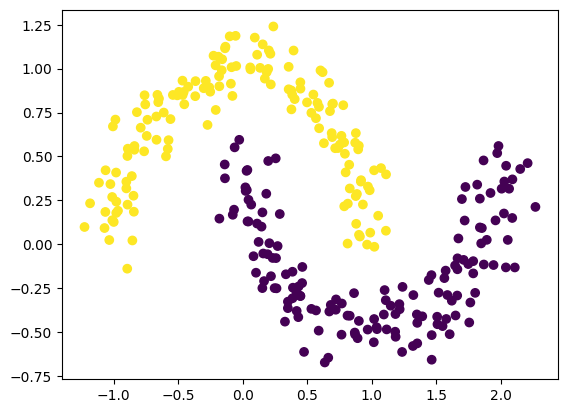

In [2]:
# 반달형 데이터
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# eps (이웃 샘플(점)과의 거리 반지름), 최소 샘플 수
dbscan = DBSCAN(eps=0.2, min_samples=4)
dbscan.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_)
plt.show()

### iris 데이터 DBSCAN

In [3]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['species'] = iris_data.target

In [5]:
# DBSCAN 적용
dbscan = DBSCAN(eps=0.6, min_samples=4)
dbscan.fit_predict(iris_data.data) # dbscan은 transform, predict가 없음

iris_df['cluster'] = dbscan.labels_
iris_df.groupby('species')['cluster'].value_counts()

species  cluster
0         0         49
         -1          1
1         1         46
          2          4
2         1         46
         -1          4
Name: count, dtype: int64

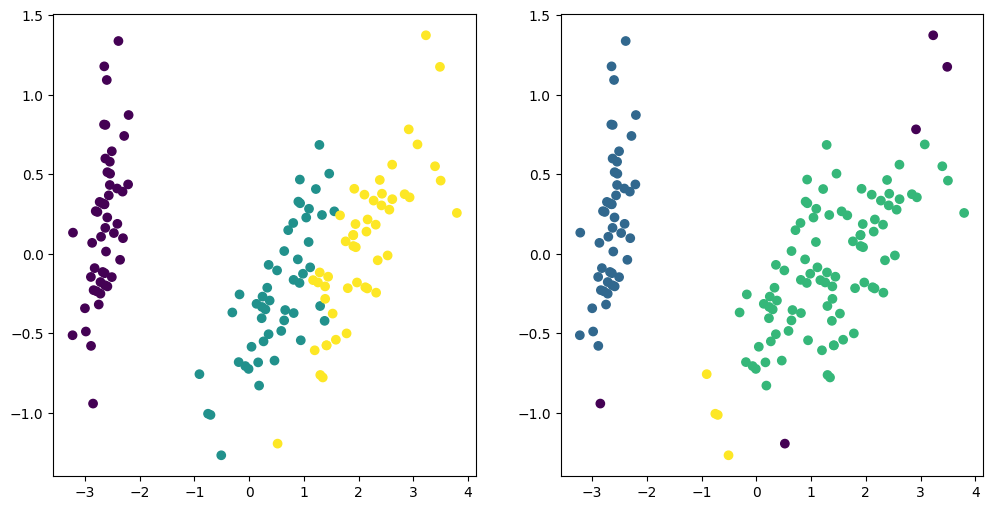

In [6]:
from sklearn.decomposition import PCA

# 시각화를 위한 PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris_data.data)
iris_df['pca1'] = pca_transformed[:, 0]
iris_df['pca2'] = pca_transformed[:, 1]

# species(라벨) 기준 시각화 + cluster(dbscan 군집) 기준 시각화
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(iris_df['pca1'], iris_df['pca2'], c=iris_df['species'])
ax[1].scatter(iris_df['pca1'], iris_df['pca2'], c=iris_df['cluster'])
plt.show()
